In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "../mouse_drug_data.csv"
clinical_trial_data_to_load = "../clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("mouse_drug_data.csv")
mouse_drug_data.head()

clinical_trial_data = pd.read_csv("clinicaltrial_data.csv")
clinical_trial_data.head()
# Combine the data into a single dataset via left merge
merge_data = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID", how="left")

# Display the data table for preview
merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
vol_merge_group = merge_data.groupby(["Drug","Timepoint"])
vol_merge_group.head()

avg_tumor_vol = vol_merge_group["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
df_mean = pd.DataFrame(avg_tumor_vol)
df_mean.reset_index(inplace=True)

# Preview DataFrame
df_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
vol_merge_group = merge_data.groupby(["Drug", "Timepoint"])
vol_merge_group.head()

std_error_vol = vol_merge_group["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
df_sem = pd.DataFrame(std_error_vol)
df_sem.reset_index(inplace=True)

# Preview DataFrame
df_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
#Drug: {Placebo, Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Propriva, Ramicane, Stelasyn, Zoniferol}
# Preview that Reformatting worked

df_mean.pivot(index='Timepoint', columns="Drug", values="Tumor Volume (mm3)")

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


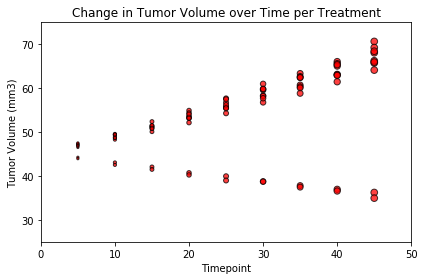

In [5]:
# Define axis 
tumor_vol_x_axis = df_mean["Timepoint"]
tumor_vol_y_axis = df_mean["Tumor Volume (mm3)"]

# Set limits 
plt.xlim(0,50)
plt.ylim(25, 75)

# Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
plt.scatter(tumor_vol_x_axis, tumor_vol_y_axis, marker="o", facecolors="red", edgecolors="black",
            s=tumor_vol_x_axis, alpha=0.75)

# Generate the Plot (with Error Bars)

# Label Plot and Fix
plt.title("Change in Tumor Volume over Time per Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.tight_layout()


# Save the Figure
plt.savefig("../Change in Tumor Volume over Time")
plt.show()

In [6]:
 # Show the Figure
plt.show()

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_merge_group = merge_data.groupby(["Drug", "Timepoint"])
meta_merge_group.head()

avg_meta_tumor_sites = meta_merge_group["Metastatic Sites"].mean()

# Convert to DataFrame
df_meta = pd.DataFrame(avg_meta_tumor_sites)
df_meta.reset_index(inplace=True)

# Preview DataFrame
df_meta.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_merge_group = merge_data.groupby(["Drug", "Timepoint"])
meta_merge_group.head()

std_error_meta = meta_merge_group["Metastatic Sites"].sem()

# Convert to DataFrame
df_meta_sem = pd.DataFrame(std_error_meta)
df_meta_sem.reset_index(inplace=True)

# Preview DataFrame
df_meta_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

df_meta.pivot(index='Timepoint', columns="Drug", values="Metastatic Sites")

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


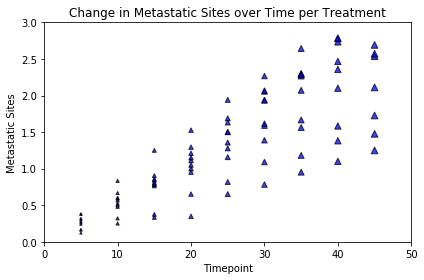

<Figure size 432x288 with 0 Axes>

In [10]:
# Define axis 
meta_vol_x_axis = df_meta["Timepoint"]
meta_vol_y_axis = df_meta["Metastatic Sites"]

# Set limits 
plt.xlim(0,50)
plt.ylim(0, 3.000000)

# Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
plt.scatter(meta_vol_x_axis, meta_vol_y_axis, marker="^", facecolors="blue", edgecolors="black",
            s=meta_vol_x_axis, alpha=0.75)

# Generate the Plot (with Error Bars)

# Label Plot and Fix and Show
plt.title("Change in Metastatic Sites over Time per Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Metastatic Sites")

plt.tight_layout()
plt.show()

# Save the Figure
plt.savefig("../Change in Metastatic Sites over Time")


In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_merge_group = merge_data.groupby(["Drug", "Timepoint"])
mice_merge_group.head()

mice_count = mice_merge_group["Mouse ID"].count()

# Convert to DataFrame
df_mice_count = pd.DataFrame(mice_count)
df_mice_count.reset_index(inplace=True)

# Preview DataFrame
df_mice_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame

df_mice_count.pivot(index='Timepoint', columns="Drug", values="Mouse ID")

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


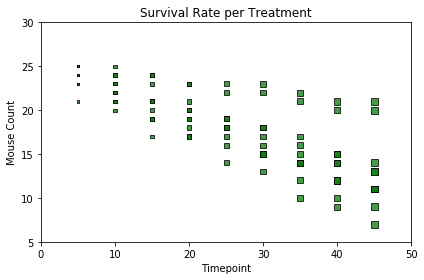

<Figure size 432x288 with 0 Axes>

In [13]:
# Define axis 
mouse_count_x_axis = df_mice_count["Timepoint"]
mouse_count_y_axis = df_mice_count["Mouse ID"]

# Set limits 
plt.xlim(0,50)
plt.ylim(5,30)

# Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
plt.scatter(mouse_count_x_axis, mouse_count_y_axis, marker="s", facecolors="green", edgecolors="black",
            s=mouse_count_x_axis, alpha=0.75)

# Generate the Plot (with Error Bars)

# Label Plot and Fix and Show
plt.title("Survival Rate per Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Mouse Count")

plt.tight_layout()
plt.show()

# Save the Figure
plt.savefig("../Survival Rate")

In [33]:
# Calculate the percent changes for each drug
df_mice_count = pd.DataFrame(mice_count)
df_mice_count.pct_change().head(20)

# Display the data to confirm

Mouse ID
Drug      Timepoint          
Capomulin 0               NaN
          5          0.000000
          10         0.000000
          15        -0.040000
          20        -0.041667
          25        -0.043478
          30         0.000000
          35         0.000000
          40        -0.045455
          45         0.000000
Ceftamin  0          0.190476
          5         -0.160000
          10        -0.047619
          15        -0.050000
          20        -0.052632
          25         0.000000
          30        -0.111111
          35        -0.125000
          40         0.000000
          45        -0.071429

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()